In [1]:
import pandas as pd
import numpy as np
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexCustomFeatures,
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexTSFeatures,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = ForexDataLoad(file_path = '../data/xauaud.csv').data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)



FOREX QUICK LOOK
 Available Fuctions 
1 display_info 
2 check_missing_values_and_duplicates 
3 plot_candlestick 
4 plot_time_series 
5 get_summary
DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    48 non-null     float64
 1   high    48 non-null     float64
 2   low     48 non-null     float64
 3   close   48 non-null     float64
 4   volume  48 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.2 KB
None

2. FIRST 3 ROWS:
                        open     high      low    close  volume
datetime                                                       
2025-09-03 19:00:00  5441.48  5452.88  5439.54  5452.58       0
2025-09-03 20:00:00  5452.56  5462.86  5447.80  5461.05       0
2025-09-03 21:00:00  5461.05  5465.36  5446.87  5454.38       0

3. LAST 3 ROWS:
        

<Figure size 1500x600 with 0 Axes>

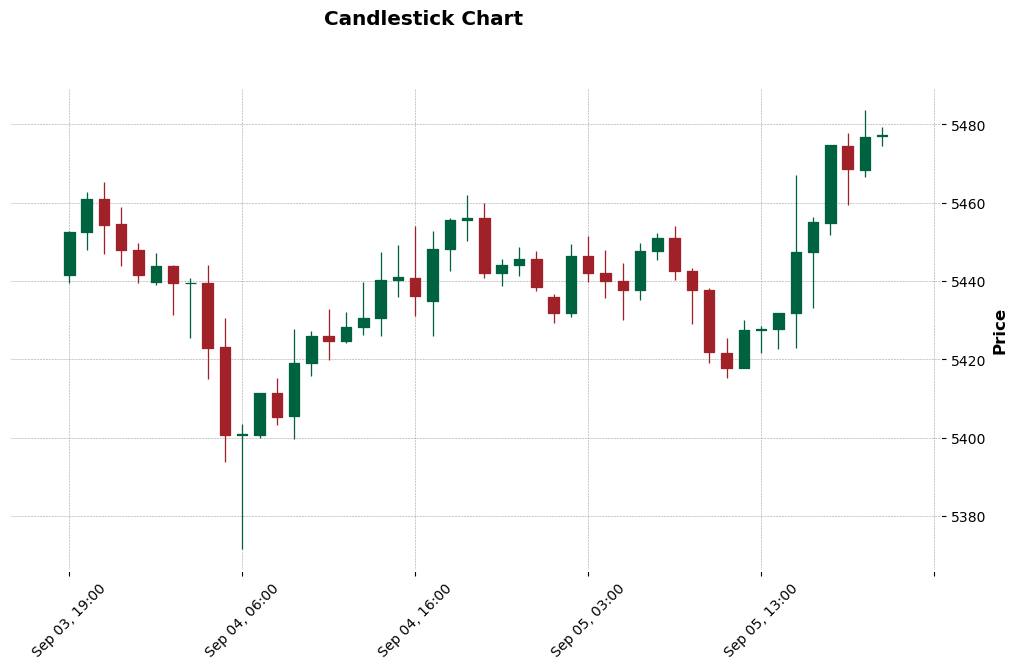

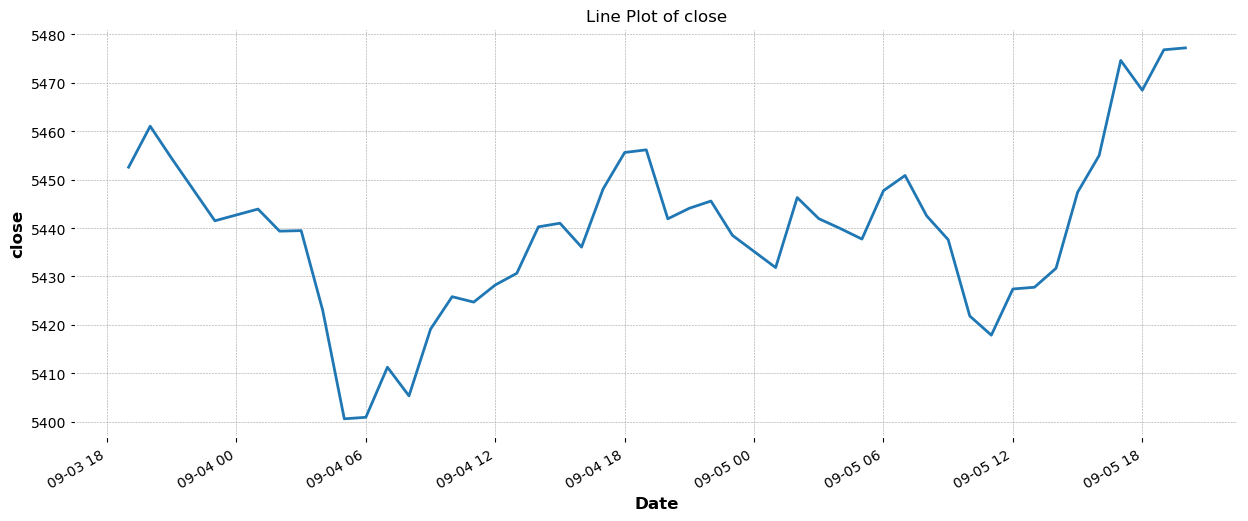

DATASET SUMMARY
Total Rows: 48
Total Columns: 5
Date Range: 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume']
Non Numeric Columns: []
Missing Values: 0
Duplicates: 0
Columns: Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
Index Column: datetime


In [3]:
quick_look = ForexQuickLook( data = df, full_look = True, periods = 48)

In [4]:
cleaner = ForexDataClean(data = df, fast_clean = True)
df = cleaner.data

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

low: Found 766 outliers (383 low, 383 high)
Bounds: [1816.29450 - 5211.65900]
Original range: [1671.60000 - 5474.51000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

close: Found 76

In [5]:
df

,open,high,low,close,volume
datetime,,,,,
2017-04-24 02:00:00,1686.03,1686.15,1681.30,1682.15,4146
2017-04-24 03:00:00,1682.11,1691.44,1681.90,1689.13,4329
2017-04-24 04:00:00,1689.09,1689.24,1685.89,1687.68,2609
2017-04-24 05:00:00,1687.65,1688.84,1686.15,1688.36,1592
2017-04-24 06:00:00,1688.34,1689.59,1686.91,1687.06,1275
...,...,...,...,...,...
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0


In [6]:
trends = ForexTrendIndicators(data = df).get_all_trend_indicators()
trends.dropna()


TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar 
6 add_trend_confirmation


,open,high,low,close,volume,trend_sma_20,trend_sma_20_slope,trend_sma_50,trend_sma_50_slope,trend_sma_100,...,trend_ema_26,trend_ema_50,trend_ema_50_slope,trend_macd_line,trend_macd_signal,trend_macd_histogram,trend_adx,trend_plus_di,trend_minus_di,trend_parabolic_sar
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-25 08:00:00,1858.30,1859.15,1858.02,1858.37,0,1853.9015,0.4785,1847.5000,0.3598,1769.9229,...,1849.793784,1829.400748,1.182418,5.981808,6.945520,-0.963712,51.807123,30.161342,8.632179,1856.309360
2019-03-25 09:00:00,1858.37,1859.40,1857.13,1857.96,0,1854.2200,0.3185,1847.8336,0.3336,1771.6112,...,1850.398689,1830.520718,1.119971,5.712965,6.699009,-0.986043,51.521892,28.686054,10.127695,1861.030000
2019-03-25 10:00:00,1857.96,1860.14,1856.84,1858.41,0,1854.6340,0.4140,1848.1106,0.2770,1773.3185,...,1850.992120,1831.614416,1.093697,5.473127,6.453833,-0.980706,51.414961,28.240650,9.407310,1860.952000
2019-03-25 11:00:00,1858.41,1858.52,1856.21,1858.28,0,1854.9475,0.3135,1848.3650,0.2544,1775.0177,...,1851.531963,1832.660125,1.045709,5.212477,6.205561,-0.993085,50.914978,26.803418,10.316522,1860.787520
2019-03-25 12:00:00,1858.28,1858.31,1856.01,1857.53,0,1855.4010,0.4535,1848.6364,0.2714,1776.7224,...,1851.976262,1833.635414,0.975289,4.889033,5.942256,-1.053223,50.320507,25.416446,10.232649,1860.512869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,5438.7805,-0.0580,5435.8618,0.8922,5396.5852,...,5436.716585,5427.020285,1.142437,1.618773,1.085136,0.533637,15.971064,26.705218,16.867883,5416.314800
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,5440.4165,1.6360,5436.9340,1.0722,5398.2257,...,5439.525727,5428.887725,1.867440,4.394961,1.747101,2.647860,17.384413,32.077099,15.179211,5417.328904
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,5441.6360,1.2195,5437.7528,0.8188,5399.7764,...,5441.671228,5430.440755,1.553030,6.029353,2.603551,3.425802,18.829879,30.830188,13.974317,5419.627748


In [7]:
momentum = ForexMomentumIndicators(data = df)

MOMENTUM INDICATORS
 Available Fuctions 
1 add_rsi 
2 add_stochastic 
3 add_williams_r 
4 add_cci 
5 add_momentum 
6 get_all_momentum_indicators


In [8]:
momentum.get_all_momentum_indicators().tail(10)

,open,high,low,close,volume,momen_rsi_14,momen_rsi_14_trend,momen_rsi_21,momen_rsi_21_trend,momen_rsi_28,momen_rsi_28_trend,momen_stoch_slowk,momen_stoch_slowd,momen_williams_r,momen_cci,momen_momentum_10,momen_momentum_14,momen_momentum_20
datetime,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,39.924414,-1.763241,45.570117,-1.312349,49.109839,-1.043940,13.131102,27.527613,-93.281654,-260.107454,-13.96,-24.04,-22.38
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,45.864889,5.940475,49.169326,3.599209,51.625410,2.515571,14.891953,17.453334,-68.630491,-157.023124,-18.89,-16.68,-13.59
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,46.081560,0.216670,49.302158,0.132832,51.718806,0.093396,23.462532,17.161863,-67.700258,-123.113399,-14.17,-17.81,-8.29
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,48.498726,2.417166,50.772957,1.470799,52.748957,1.030151,35.366064,24.573516,-57.571059,-86.038427,-8.21,-6.79,-16.39
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,56.843485,8.344759,56.125706,5.352749,56.595460,3.846503,45.602770,34.810455,-37.920371,58.033198,9.67,15.56,-8.22
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,60.208992,3.365507,58.426432,2.300725,58.301746,1.706286,60.432118,47.133651,-23.212215,85.212017,7.28,8.70,-1.16
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,67.294154,7.085162,63.596775,5.170344,62.269453,3.967707,79.532866,61.855918,-0.268817,220.359631,23.77,32.69,32.72
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,63.480472,-3.813682,61.097193,-2.499583,60.402115,-1.867338,87.200172,75.721719,-14.918452,197.729686,25.95,28.58,24.39
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,66.275040,2.794568,63.161323,2.064130,62.006338,1.604223,91.560448,86.097828,-10.131387,205.763393,39.24,39.11,31.25


In [9]:
volatility = ForexVolatilityIndicators(data = df)

VOLATILITY INDICATORS
 Available Fuctions 
1 add_atr 
2 add_bollinger_bands 
3 add_keltner_channels 
4 add_standard_deviation  
5 get_all_volatility_indicators


In [10]:
volatility.get_all_volatility_indicators().tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_14_pct,vol_atr_14_trend,vol_atr_14_high_vol,vol_atr_21,...,vol_bb_50_pct_b,vol_bb_50_above_upper,vol_bb_50_below_lower,vol_bb_50_squeeze,vol_keltner_middle,vol_keltner_upper,vol_keltner_lower,vol_std_dev_20,vol_std_dev_50,vol_std_dev_100
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,0.261138,-0.310626,0,14.579162,...,21.690875,0,0,1,5436.484861,5463.965423,5409.004298,9.324447,14.322061,57.792779
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,0.258128,-0.138438,0,14.466345,...,37.965426,0,0,1,5435.621540,5462.796047,5408.447034,9.794178,14.202413,56.634311
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,0.248544,-0.519264,0,14.098424,...,38.650106,0,0,1,5434.874727,5460.679783,5409.069671,10.141455,14.212468,55.188630
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,0.242920,-0.295745,0,13.872309,...,44.978598,0,0,1,5434.572372,5459.666922,5409.477822,10.122387,14.017003,54.256884
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,0.282823,2.211808,0,15.314580,...,72.103762,0,0,1,5435.794051,5467.211146,5404.376956,9.602899,14.059145,53.994257
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,0.292424,0.545250,0,15.682457,...,84.473788,0,0,1,5437.624141,5470.507527,5404.740756,9.501006,13.886057,53.575516
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,0.300663,0.508447,0,16.034244,...,113.939957,1,0,1,5441.149461,5475.358508,5406.940414,12.304267,14.742737,53.428630
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,0.303600,0.142129,0,16.149280,...,100.144740,1,0,1,5443.753322,5478.231465,5409.275180,13.734463,15.324239,53.194591
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,0.303929,0.043406,0,16.199791,...,108.801867,1,0,1,5446.904434,5481.376762,5412.432106,15.728269,16.202972,53.074741


In [11]:
volume = ForexVolumeIndicators(data = df)

VOLUME INDICATORS
 Available Fuctions 
1 add_obv 
2 add_volume_sma 
3 add_volume_roc 
4 get_all_volume_indicators


In [12]:
volume.get_all_volume_indicators().tail(10)

KeyError: 'obv'

In [ ]:
x = volume.data.shape[0]

In [ ]:
x

38216

In [ ]:
y = volume.data.dropna().shape[0]

In [ ]:
y

3

In [ ]:
df[df['volume'] == 0].shape 

(38168, 5)

In [ ]:
#Problem with volume from MT5 data 

In [ ]:
custom = ForexCustomFeatures(data = df)

CUSTOM FEATURES
 Available Functions: 
1 add_returns_features 
2 add_volatility_measures 
3 add_price_position_features 
4 add_seasonality_features 
5 add_time_based_features 
6 add_custom_derived_features 
7 get_all_custom_features


In [ ]:
custom.get_all_custom_features().tail(10)

,open,high,low,close,volume,return_1,log_return_1,return_vol_1,return_direction_1,return_5,...,season,minutes_since_monday_open,period_of_day,days_to_month_end,days_to_quarter_end,price_acceleration,momentum_ratio,vol_normalized_return,range_expansion,range_contraction
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,-0.000730,-0.000731,NaN,-1,-0.005479,...,summer,6420,morning,25,25,-0.002909,2.132015,-0.031354,0,0
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,0.001761,0.001759,NaN,1,-0.004302,...,summer,6480,morning,25,25,-0.000834,1.240359,0.072457,0,0
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,0.000066,0.000066,NaN,1,-0.002712,...,summer,6540,afternoon,25,25,-0.000108,1.041524,0.002749,0,0
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,0.000722,0.000722,NaN,1,-0.001085,...,summer,6600,afternoon,25,25,0.000424,0.718941,0.031670,0,0
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,0.002890,0.002886,NaN,1,0.004714,...,summer,6660,afternoon,25,25,0.002936,2.650973,0.117057,1,0
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,0.001397,0.001396,NaN,1,0.006853,...,summer,6720,afternoon,25,25,0.005517,5.128374,0.055355,1,0
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,0.003599,0.003592,NaN,1,0.008700,...,summer,6780,evening,25,25,0.004339,1.995121,0.136643,1,0
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,-0.001123,-0.001124,NaN,-1,0.007500,...,summer,6840,evening,25,25,0.002732,1.573052,-0.041902,0,0
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,0.001527,0.001526,NaN,1,0.008310,...,summer,6900,evening,25,25,0.001094,1.151606,0.056125,0,0
